### Author: Vidhi Kokel
# Understand the template

#### What is the experimental protocol used and how was it carried out? How did we tune hyper-parameters in the template? What is the search space and what is the criteria to determine good/bad hyper-parameters?
#### ✅The experimental protocols used here are a combination of following layers combined in a sequential model with multiple layers. 
1. Embedding Layer
2. LSTM Layer
3. GRU Layer
4. Bidirectional LSTM Layer
5. Birdirectional GRU Layer
6. Convolutional Layer
7. Max Pooling Layer
8. Fully Connected Layer

#### The search space for the experiment is various hyper-parameters that can affect the performance of the model which are listed below.
1. Number of Hidden layers and units
2. Different types of layers
3. Weight Initialization
4. Activation functions
5. Learning Rate
6. Number of epochs
7. Batch size

#### The template shows how a multi-modality (both text and image inputs) multi-objective (predicting both price and type) solution can be provided for the current problem by using Embedding and reduced_mean layers for text inputs and a convolutional layer with max pooling for the image inputs. The loss weights have been set in the template. The criteria to decide good/bad hyper-parameters depends on how well the neural network is able to learn. It should not under-fit or overfit.

# Problem Definition
#### Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?
#### ✅We are given the textual summary and images of multiple air bnb listings in Montreal in 2019. From these summaries and images we have to classify the type of the listing as well as the price category in which the property belongs to. There are following 3 sets of inputs used accross all the experiments. 

- Text(summary) + Image
- Text(summary) only
- Image only

#### Moreover, there are following 3 sets of outputs representing the type and price category of the property listing that are possible from the above experiments. But since we have to find out the price in our problem, I have only used price prediction for submitting the solutions on Kaggle.

- Price + Type
- Price only
- Type only

#### Classification is required for this problem. The challenges could be the image resolution, unclear summary and not clean textual summary. The impact might be misclassification of the types and prices leading to false positives or false negatives. The ideal solution is a classification algorithm that accurately identifies the price and type categories for a given listing.

# Theoretical Questions

#### 🌈Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?
#### ✅For sequential data fully-connected model is a good model
#### Because they are “structure agnostic.” That is, no special assumptions need to be made about the inputs.
#### ✅For image data fully-connected model is not a good model.
#### Because when it comes to classifying images — lets say with size 64x64x3 — fully connected layers need 12288 weights in the first hidden layer! The number of weights will be even bigger for images with size 225x225x3 = 151875. Networks having large number of parameter face several problems, for e.g. slower training time, chances of overfitting e.t.c.
##### Source: https://medium.datadriveninvestor.com/convolution-neural-networks-vs-fully-connected-neural-networks-8171a6e86f15
#### 🌈What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?
#### ✅Gradient Vanishing
#### Vanishing Gradient occurs when the derivative or slope will get smaller and smaller as we go backward with every layer during backpropagation.
#### When weights update is very small or exponential small, the training time takes too much longer, and in the worst case, this may completely stop the neural network training.
#### A vanishing Gradient problem occurs with the sigmoid and tanh activation function because the derivatives of the sigmoid and tanh activation functions are between 0 to 0.25 and 0–1. Therefore, the updated weight values are small, and the new weight values are very similar to the old weight values. This leads to Vanishing Gradient problem. We can avoid this problem using the ReLU activation function because the gradient is 0 for negatives and zero input, and 1 for positive input.
#### ✅Gradient explosion
#### Exploding gradient occurs when the derivatives or slope will get larger and larger as we go backward with every layer during backpropagation. This situation is the exact opposite of the vanishing gradients.
#### This problem happens because of weights, not because of the activation function. Due to high weight values, the derivatives will also higher so that the new weight varies a lot to the older weight, and the gradient will never converge. So it may result in oscillating around minima and never come to a global minima point.
##### Source: https://medium.datadriveninvestor.com/vanishing-and-exploding-gradients-in-neural-networks-bddd4504e59c 
#### ✅How GRU/LSTM tries to mitigate this problem
#### LSTMs solve the problem using a unique additive gradient structure that includes direct access to the forget gate’s activations, enabling the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning process.
##### Source: https://medium.datadriveninvestor.com/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577#:~:text=LSTMs%20solve%20the%20problem%20using,step%20of%20the%20learning%20process.
#### GRU’s are able to solve the vanishing gradient problem by using an update gate and a reset gate. The update gate controls information that flows into memory, and the reset gate controls the information that flows out of memory. The update gate and reset gate are two vectors that decide which information will get passed on to the output. They can be trained to keep information from the past or remove information that is irrelevant to the prediction.
##### Source: https://deepai.org/machine-learning-glossary-and-terms/gated-recurrent-unit
#### 🌈What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?
#### ✅Multi-objective/multi-task learning: The learning task where multiple objectives are achieved or multiple tasks are performed parallely is called multi-objective/multi-task learning. For eg. Here, in this problem we are trying to predict the price and type categories of the listing thus achieveing results for both of them parallely.
#### ✅Multi-modality learning: The learning task where 2 or more than 2 types/kinds of inputs are used is called multi-modality learning. For eg. Here, in this problem we are using both listing summaries and thumbnails as inputs to predict their respective type and price categories.

#### 🌈What is the difference among xgboost, lightgbm and catboost?
#### ✅Tree Symmetry
#### In CatBoost, symmetric trees, or balanced trees, refer to the splitting condition being consistent across all nodes at the same depth of the tree. LightGBM and XGBoost, on the other hand, results in asymmetric trees, meaning splitting condition for each node across the same depth can differ. Even though LightGBM and XGBoost are both asymmetric trees, LightGBM grows leaf-wise (horizontally) while XGBoost grows level-wise (vertically). To put it simply, we can think of LightGBM as growing the tree selectively, resulting in smaller and faster models compared to XGBoost.
#### ✅Splitting Method
#### In CatBoost, a greedy method is used such that a list of possible candidates of feature-split pairs are assigned to the leaf as the split and the split that results in the smallest penalty is selected.
#### In LightGBM, Gradient-based One-Side Sampling (GOSS) keeps all data instances with large gradients and performs random sampling for data instances with small gradients.
#### In XGBoost, the pre-sorted algorithm considers all feature and sorts them by feature value. After which, a linear scan is done to decide the best split for the feature and feature value that results in the most information gain.
#### ✅Type of Boosting
#### CatBoost supports ordered boosting while others don't. Ordered boosting refers to the case when each model trains on a subset of data and evaluates another subset of data. Benefits of ordered boosting include increasing robustness to unseen data.
#### ✅Data-type Support
- Numerical Columns: Supported by all 3.
- Categorical Columns: Supported by all 3 but with some constraints of encoding the categorical values.
- Text Columns: Only supported by CatBoost.

#### ✅Handle Missing Values
#### All of them handle the missing values
#### ✅Performance
#### Generally, from the literature, XGBoost and LightGBM yield similar performance, with CatBoost and LightGBM performing much faster than XGBoost, especially for larger datasets.
##### Source: https://towardsdatascience.com/catboost-vs-lightgbm-vs-xgboost-c80f40662924

# Trial Discussion

#### ✅✅✅✅Here from all the 5 approaches, multi modality implementations outperform the implementations using only text inputs and that using only text inputs outperform the implementation that uses only image inputs.

In [1]:
# you can also download the data by running the following line (linux only) 
# if you already got the data from kaggle, you can skip this cell.

# ! wget https://github.com/CISC-873/Information-2021/releases/download/data/a4.zip
# ! unzip -q a4.zip

In [2]:
# Import the required libraries and datasets
import os

import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np

xy_train_df = pd.read_csv('train_xy.csv')
x_test_df = pd.read_csv('test_x.csv')

In [3]:
# Checking the training dataframe
xy_train_df

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [4]:
# Checking the testing dataframe
x_test_df

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg
...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg


In [5]:
# preprocess image data

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr


# loading images:
x_image = np.array([load_image(i) for i in tqdm(xy_train_df.image)])

# loading summary: (force convert some of the non-string cell to string)
x_text = xy_train_df.summary.astype('str')

  0%|          | 0/7627 [00:00<?, ?it/s]

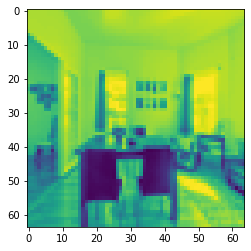

In [6]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(x_image[0, :, :, 0])

In [7]:
# Split training dataset and labels into training and validation datasets
from sklearn.model_selection import train_test_split

# labels:
y_price = xy_train_df.price
y_type = xy_train_df.type.astype('category').cat.codes

len_price = len(y_price.unique())
len_type = len(y_type.unique())
print('unique values for price category', len_price, y_price.unique())
print('unique values for type category', len_type, y_type.unique())

# splitting:

x_tr_image, x_vl_image, x_tr_text, x_vl_text, y_tr_price, y_vl_price, y_tr_type, y_vl_type = train_test_split(
    x_image, 
    x_text,
    y_price,
    y_type,
    test_size=0.2)

print(np.shape(x_tr_image))
print(np.shape(x_vl_image))
print(np.shape(y_tr_price))
print(np.shape(y_vl_price))
print(np.shape(y_tr_type))
print(np.shape(y_vl_type))

unique values for price category 3 [1 0 2]
unique values for type category 24 [ 1 17 22 10 18 20  5  2  8  4 23 13 15 16 14 11 19  0 21  3  6 12  7  9]
(6101, 64, 64, 2)
(1526, 64, 64, 2)
(6101,)
(1526,)
(6101,)
(1526,)


In [8]:
# preprocess text data

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
  
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

vocab_size = 40000
# vocab_size = 10000
max_len = 100


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_tr_text)

# clean and standardize the summaries
def clean_text(list_of_text):
    cleaned_text = []
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    for text in list_of_text:
        text = re.sub(r'[^\w\s]','',text, re.UNICODE)
        text = text.lower()
        text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
        text = [lemmatizer.lemmatize(token, "v") for token in text]
        text = [word for word in text if  not word in stop_words]
        text = " ".join(text)
        cleaned_text.append(text)
    return cleaned_text

def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
    
# Clean text
# x_tr_text_cleaned = clean_text(x_tr_text)
# x_vl_text_cleaned = clean_text(x_vl_text)
    
# padding is done inside: 
# x_tr_text_id = _preprocess(x_tr_text_cleaned)
# x_vl_text_id = _preprocess(x_vl_text_cleaned)
x_tr_text_id = _preprocess(x_tr_text)
x_vl_text_id = _preprocess(x_vl_text)

print(x_tr_text_id.shape)
print(x_vl_text_id.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(6101, 100)
(1526, 100)


In [9]:
# Prints the padded sequences
pprint(tokenizer.sequences_to_texts(x_tr_text_id[:5]))

['appartement propre et calme dans un beau duplexe de 3 appartements seulement '
 'pour 2 personnes et il y a un canapé dans le salon pour une troisième '
 'personne 2 balcons devant au salon et derrière dans la cuisine qui donne sur '
 'un beau jardin pour admirer la nature durant le pti dej chauffage efficace '
 'et conviviable université de montréal et hec sont à 15min de marche à 2 min '
 'de marche le bus 165 peut vous mener partout via métro des supermarchés et '
 'restaurations sont juste à coté',
 'fully furnished and fully equipped 2 floors house in montreal it is a 2600 '
 'sq foot house that can accommodate several people i can add more mattresses '
 'if needed for large groups this house is located in a super safe '
 'neighbourhood and close to super markets banks shopping mall and several '
 'restaurants 3 bedrooms 5 beds 2 bathrooms a large kitchen 1 parking you will '
 "be impressed by its large living room in the basement it's terrace and "
 'private garden',
 'charming

In [10]:
# Prints the total words in vocabulary
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


In [11]:
# Imports required libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.layers import Bidirectional, GRU, LSTM, Attention, MultiHeadAttention, Dropout
from tensorflow.keras.optimizers import Adam

#### 🌈 Approach 1: Multi Objective (Predicting Price and Type) Multi Modality (Image + Text) Price Prediction
##### Here both text and image inputs are considered for the training and both prices and types for the test dataset are predicted/classified.

In [12]:
# Input layer for text and image inputs
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# Embedding layer for the text inputs
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
# Apply reduce mean to reduce the shape of the tensor for all inputs
averaged = tf.reduce_mean(embedded, axis=1)


# image part
# Convolutional layer taking image inputs
cov = Conv2D(32, (16, 16))(in_image)
# Max Pooling layer taking output from the convolutional layer as it's input
pl = MaxPool2D((16, 16))(cov)
# Flatten layer that flattens the images 
flattened = Flatten()(pl)


# fusion:
# Concatenates the layers for both text and image parts
fused = tf.concat([averaged, flattened], axis=-1)

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
p_type = Dense(len_type, activation='softmax', name='type')(fused)

# Provides the inputs and outputs of the model
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

# Compiles the model and defines the loss functions, loss weights and evaluation metrics
# to be utilised for each objective respectively
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [13]:
# Train the model by providing respecitve inputs, outputs and hyper-parameters
history = model.fit(
    x={
        'summary': x_tr_text_id,
        'image': x_tr_image
    },
    y={
        'price': y_tr_price,
        'type': y_tr_type,
    },
    epochs=20,
    batch_size=16,
    validation_data=(
        {
            'summary': x_vl_text_id,
            'image': x_vl_image
         }, 
        {
            'price': y_vl_price,
            'type': y_vl_type,
        }),
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
305/305 [==============================] - 20s 63ms/step - loss: 25.5367 - price_loss: 24.0028 - type_loss: 27.0707 - price_sparse_categorical_accuracy: 0.4879 - type_sparse_categorical_accuracy: 0.5752 - val_loss: 14.2379 - val_price_loss: 10.1294 - val_type_loss: 18.3464 - val_price_sparse_categorical_accuracy: 0.6011 - val_type_sparse_categorical_accuracy: 0.7469
Epoch 2/20
305/305 [==============================] - 19s 63ms/step - loss: 8.6141 - price_loss: 5.4652 - type_loss: 11.7630 - price_sparse_categorical_accuracy: 0.5078 - type_sparse_categorical_accuracy: 0.5773 - val_loss: 5.1708 - val_price_loss: 4.1599 - val_type_loss: 6.1817 - val_price_sparse_categorical_accuracy: 0.4054 - val_type_sparse_categorical_accuracy: 0.5455
Epoch 3/20
305/305 [==============================] - 21s 68ms/step - loss: 6.2286 - price_loss: 4.5061 - type_loss: 7.9510 - price_sparse_categorical_accuracy: 0.5287 - type_sparse_categorical_accuracy: 0.5936 - val_loss: 6.6674 - val_price_los

In [14]:
# Load and preprocess test dataset 
x_test_summary = _preprocess(clean_text(x_test_df.summary.astype(str)))
x_test_image = np.array([load_image(i) for i in tqdm(x_test_df.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [15]:
# Predict the outputs for the test dataset
y_predict = model.predict(
    {
        'summary': x_test_summary,
        'image': x_test_image
    }
)

# Process the model outputs
price_predicted = y_predict['price']
print(price_predicted)
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[1.0000000e+00 3.3960576e-13 3.8120925e-27]
 [1.0000000e+00 2.2703590e-09 3.3316945e-20]
 [1.0000000e+00 1.0824574e-10 6.9895137e-25]
 ...
 [9.9999988e-01 8.5905363e-08 2.0315296e-24]
 [1.0000000e+00 4.0475201e-10 5.0402993e-31]
 [1.0000000e+00 1.6841716e-09 1.4552738e-31]]
[0 0 0 ... 0 0 0]


In [16]:
type_predicted = y_predict['type']
print(type_predicted)
type_category_predicted = np.argmax(type_predicted, axis=1)
print(type_category_predicted)

pd.DataFrame(
    {'id': x_test_df.id,
     'price': price_category_predicted,
     'type': type_category_predicted}).to_csv('sample_submission_multi_objective.csv', index=False)

[[0.0000000e+00 9.9999988e-01 0.0000000e+00 ... 0.0000000e+00
  9.8215414e-19 0.0000000e+00]
 [0.0000000e+00 9.9999940e-01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.9972043e-34 0.0000000e+00]
 ...
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  5.6807624e-26 0.0000000e+00]
 [0.0000000e+00 2.6611995e-06 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.7401382e-37 0.0000000e+00]]
[ 1  1  1 ...  1 17  1]


#### 🌈 Approach 2: Multi Modality (Image + Text) Price Prediction
##### Here both text and image inputs are considered for the training and price for the test dataset is predicted/classified.
##### Tried following other hyper-parameter combinations as follows in the current implementation for this approach:
1. Bidirectional GRU(32)
2. Bidirectional GRU(64)
3. More Dense Layers for image part

In [17]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [18]:
# in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
# z = Bidirectional(GRU(64))(embedded)
# averaged = tf.reduce_mean(z, axis=1)
embed_size = 100
sequence_input = keras.Input(shape=(max_len,), dtype="int32")
embedded_sequences = keras.layers.Embedding(vocab_size, embed_size)(sequence_input)

rnn_cell_size = 128
lstm = Bidirectional(LSTM(rnn_cell_size, return_sequences = True), name="bi_lstm_0")(embedded_sequences)
# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(rnn_cell_size, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)
state_h = keras.layers.Concatenate()([forward_h, backward_h])
state_c = keras.layers.Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(10)(lstm, state_h)
dense1 = Dense(16, activation="relu")(context_vector)
dropout_text = Dropout(0.3)(dense1)

# image part
cov = Conv2D(32, (16, 16))(in_image)

pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)
dense = Dense(16)(flattened)
dropout = keras.layers.Dropout(0.3)(dense)


# fusion:
# fused = tf.concat([averaged, flattened], axis=-1)
# fused = tf.concat([z, dropout], axis=-1)
fused = tf.concat([dropout_text, dropout], axis=-1)

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
# p_type = Dense(len_type, activation='softmax', name='type')(fused)


model = keras.Model(
    inputs={
        'summary': sequence_input,
        'image': in_image
    },
    outputs={
        'price': p_price,
#         'type': p_type,
    },
)


model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
#         'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
#         'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
#         'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 100)     4000000     ['input_4[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 100, 256)     234496      ['embedding_1[0][0]']            
                                                                                                  
 input_3 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                            

In [19]:
history = model.fit(
    x={
        'summary': x_tr_text_id,
        'image': x_tr_image
    },
    y={
        'price': y_tr_price,
#         'type': y_tr_type,
    },
    epochs=50,
    batch_size=16,
    validation_data=(
        {
            'summary': x_vl_text_id,
            'image': x_vl_image
         }, 
        {
            'price': y_vl_price,
#             'type': y_vl_type,
        }),
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, )
    ],
    verbose=1
)

Epoch 1/50
305/305 [==============================] - 55s 167ms/step - loss: 18.4906 - sparse_categorical_accuracy: 0.4814 - val_loss: 3.8401 - val_sparse_categorical_accuracy: 0.4955
Epoch 2/50
305/305 [==============================] - 50s 165ms/step - loss: 5.8784 - sparse_categorical_accuracy: 0.4977 - val_loss: 2.9820 - val_sparse_categorical_accuracy: 0.6077
Epoch 3/50
305/305 [==============================] - 51s 167ms/step - loss: 2.7297 - sparse_categorical_accuracy: 0.5025 - val_loss: 1.4534 - val_sparse_categorical_accuracy: 0.5512
Epoch 4/50
305/305 [==============================] - 58s 191ms/step - loss: 1.6079 - sparse_categorical_accuracy: 0.5141 - val_loss: 0.9994 - val_sparse_categorical_accuracy: 0.4701
Epoch 5/50
305/305 [==============================] - 56s 184ms/step - loss: 1.0010 - sparse_categorical_accuracy: 0.5480 - val_loss: 0.7739 - val_sparse_categorical_accuracy: 0.5676
Epoch 6/50
305/305 [==============================] - 55s 181ms/step - loss: 0.7709 

In [20]:
x_test_summary = _preprocess(clean_text(x_test_df.summary.astype(str)))
x_test_image = np.array([load_image(i) for i in tqdm(x_test_df.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [21]:
y_predict = model.predict(
    {
        'summary': x_test_summary,
        'image': x_test_image
    }
)

y_predict

{'price': array([[6.0268295e-01, 3.8016829e-01, 1.7148769e-02],
        [9.0975350e-01, 9.0031676e-02, 2.1480401e-04],
        [6.8708915e-01, 9.6717514e-02, 2.1619333e-01],
        ...,
        [8.7592030e-01, 1.2398951e-01, 9.0192800e-05],
        [6.6669488e-01, 3.1563118e-01, 1.7673977e-02],
        [3.4807354e-01, 6.4041358e-01, 1.1512849e-02]], dtype=float32)}

In [22]:
price_predicted = y_predict['price']
print(price_predicted)
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[6.0268295e-01 3.8016829e-01 1.7148769e-02]
 [9.0975350e-01 9.0031676e-02 2.1480401e-04]
 [6.8708915e-01 9.6717514e-02 2.1619333e-01]
 ...
 [8.7592030e-01 1.2398951e-01 9.0192800e-05]
 [6.6669488e-01 3.1563118e-01 1.7673977e-02]
 [3.4807354e-01 6.4041358e-01 1.1512849e-02]]
[0 0 0 ... 0 0 1]


In [23]:
pd.DataFrame(
    {'id': x_test_df.id,
     'price': price_category_predicted}).to_csv('sample_submission_multi_modality.csv', index=False)

#### 🌈 Approach 3: Text inputs with BiDirectional GRU/LSTM layer (Multiobjective included)
##### Here only text inputs are considered for the training using Bidirectional GRU and Bidirectional LSTM and price for the test dataset is predicted/classified. Additionally type of the listings can also be predicted by uncommenting the commented code.

In [24]:
in_text = keras.Input(batch_shape=(None, max_len))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
# z = Bidirectional(LSTM(32))(embedded)
z = Bidirectional(GRU(64))(embedded)

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(z)
# p_type = Dense(len_type, activation='softmax', name='type')(z)


model = keras.Model(
    inputs={
        'summary': in_text
    },
    outputs={
        'price': p_price,
#         'type': p_type,
    },
)


model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
#         'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
#         'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
#         'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          4000000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              63744     
 l)                                                              
                                                                 
 price (Dense)               (None, 3)                 387       
                                                                 
Total params: 4,064,131
Trainable params: 4,064,131
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(
    x={
        'summary': x_tr_text_id
    },
    y={
        'price': y_tr_price,
#         'type': y_tr_type,
    },
    epochs=20,
    batch_size=16,
    validation_data=(
        {
            'summary': x_vl_text_id
         }, 
        {
            'price': y_vl_price,
#             'type': y_vl_type,
        }),
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
305/305 [==============================] - 18s 54ms/step - loss: 0.3995 - sparse_categorical_accuracy: 0.6381 - val_loss: 0.3849 - val_sparse_categorical_accuracy: 0.6560
Epoch 2/20
305/305 [==============================] - 17s 56ms/step - loss: 0.3338 - sparse_categorical_accuracy: 0.7064 - val_loss: 0.3849 - val_sparse_categorical_accuracy: 0.6511
Epoch 3/20
305/305 [==============================] - 17s 57ms/step - loss: 0.2721 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.4117 - val_sparse_categorical_accuracy: 0.6306
Epoch 4/20
305/305 [==============================] - 17s 57ms/step - loss: 0.2179 - sparse_categorical_accuracy: 0.8189 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.6568
Epoch 5/20
305/305 [==============================] - 18s 58ms/step - loss: 0.1623 - sparse_categorical_accuracy: 0.8727 - val_loss: 0.5256 - val_sparse_categorical_accuracy: 0.6143
Epoch 6/20
305/305 [==============================] - 15s 51ms/step - loss: 0.1308 - spars

In [26]:
x_test_summary = _preprocess(clean_text(x_test_df.summary.astype(str)))

In [27]:
y_predict = model.predict(
    {
        'summary': x_test_summary
    }
)

y_predict

{'price': array([[1.7677167e-04, 9.9077034e-01, 9.0528112e-03],
        [9.9996281e-01, 3.4082128e-05, 3.0863500e-06],
        [9.9993992e-01, 5.6576293e-05, 3.4882057e-06],
        ...,
        [1.4041792e-01, 8.4968174e-01, 9.9002579e-03],
        [9.9998450e-01, 1.3129831e-05, 2.3274135e-06],
        [3.3826292e-02, 5.6275493e-01, 4.0341881e-01]], dtype=float32)}

In [28]:
price_predicted = y_predict['price']
print(price_predicted)
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

pd.DataFrame(
    {'id': x_test_df.id,
     'price': price_category_predicted}).to_csv('sample_submission_text_inputs.csv', index=False)

[[1.7677167e-04 9.9077034e-01 9.0528112e-03]
 [9.9996281e-01 3.4082128e-05 3.0863500e-06]
 [9.9993992e-01 5.6576293e-05 3.4882057e-06]
 ...
 [1.4041792e-01 8.4968174e-01 9.9002579e-03]
 [9.9998450e-01 1.3129831e-05 2.3274135e-06]
 [3.3826292e-02 5.6275493e-01 4.0341881e-01]]
[1 0 0 ... 1 0 1]


#### 🌈 Approach 4: Text inputs with Attention layer (Multiobjective included)
##### Here only text inputs are considered for the training using Attention and price for the test dataset is predicted/classified. Additionally type of the listings can also be predicted by uncommenting the commented code.

In [29]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [30]:
embed_size = 100
sequence_input = keras.Input(shape=(max_len,), dtype="int32")
embedded_sequences = keras.layers.Embedding(vocab_size, embed_size)(sequence_input)

rnn_cell_size = 128
lstm = Bidirectional(LSTM(rnn_cell_size, return_sequences = True), name="bi_lstm_0")(embedded_sequences)
# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(rnn_cell_size, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)
state_h = keras.layers.Concatenate()([forward_h, backward_h])
state_c = keras.layers.Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(10)(lstm, state_h)
dense1 = Dense(16, activation="relu")(context_vector)
dropout = Dropout(0.3)(dense1)
p_price = Dense(len_price, activation='softmax', name='price')(dropout)


model = keras.Model(
    inputs={
        'summary': sequence_input
    },
    outputs={
        'price': p_price,
#         'type': p_type,
    },
)


model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
#         'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
#         'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
#         'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 100)     4000000     ['input_6[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 100, 256)     234496      ['embedding_3[0][0]']            
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 100, 256),   394240      ['bi_lstm_0[0][0]']              
                                 (None, 128),                                               

In [31]:
history = model.fit(
    x={
        'summary': x_tr_text_id
    },
    y={
        'price': y_tr_price,
#         'type': y_tr_type,
    },
    epochs=50,
    batch_size=16,
    validation_data=(
        {
            'summary': x_vl_text_id
         }, 
        {
            'price': y_vl_price,
#             'type': y_vl_type,
        }),
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, )
    ],
    verbose=1
)

Epoch 1/50
305/305 [==============================] - 47s 143ms/step - loss: 0.4509 - sparse_categorical_accuracy: 0.5494 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.6183
Epoch 2/50
305/305 [==============================] - 46s 150ms/step - loss: 0.3878 - sparse_categorical_accuracy: 0.6668 - val_loss: 0.3774 - val_sparse_categorical_accuracy: 0.6429
Epoch 3/50
305/305 [==============================] - 46s 151ms/step - loss: 0.3417 - sparse_categorical_accuracy: 0.7227 - val_loss: 0.3847 - val_sparse_categorical_accuracy: 0.6470
Epoch 4/50
305/305 [==============================] - 41s 134ms/step - loss: 0.3042 - sparse_categorical_accuracy: 0.7572 - val_loss: 0.4269 - val_sparse_categorical_accuracy: 0.6503
Epoch 5/50
305/305 [==============================] - 41s 135ms/step - loss: 0.2760 - sparse_categorical_accuracy: 0.7857 - val_loss: 0.4222 - val_sparse_categorical_accuracy: 0.6143
Epoch 6/50
305/305 [==============================] - 44s 144ms/step - loss: 0.2385 -

In [32]:
# x_test_summary = _preprocess(clean_text(x_test_df.summary.astype(str)))
x_test_summary = _preprocess(x_test_df.summary.astype(str))

In [33]:
y_predict = model.predict(
    {
        'summary': x_test_summary
    }
)

y_predict

{'price': array([[4.6335861e-01, 4.2944407e-01, 1.0719736e-01],
        [9.9999738e-01, 2.6633322e-06, 3.7061049e-08],
        [9.9999440e-01, 5.5388832e-06, 8.6566928e-08],
        ...,
        [5.9235317e-01, 3.3369261e-01, 7.3954217e-02],
        [9.9999988e-01, 6.8871188e-08, 4.3052434e-10],
        [5.5936056e-01, 3.5308519e-01, 8.7554179e-02]], dtype=float32)}

In [34]:
price_predicted = y_predict['price']
print(price_predicted)
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

pd.DataFrame(
    {'id': x_test_df.id,
     'price': price_category_predicted}).to_csv('sample_submission_text_inputs_attention.csv', index=False)

[[4.6335861e-01 4.2944407e-01 1.0719736e-01]
 [9.9999738e-01 2.6633322e-06 3.7061049e-08]
 [9.9999440e-01 5.5388832e-06 8.6566928e-08]
 ...
 [5.9235317e-01 3.3369261e-01 7.3954217e-02]
 [9.9999988e-01 6.8871188e-08 4.3052434e-10]
 [5.5936056e-01 3.5308519e-01 8.7554179e-02]]
[0 0 0 ... 0 0 0]


#### 🌈 Approach 5: Image inputs with Conv2D + Dropout layer (Multiobjective included)
##### Here only image inputs are considered for the training using Convolutional and Dropout layers and price for the test dataset is predicted/classified. Additionally type of the listings can also be predicted by uncommenting the commented code.

In [35]:
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# image part
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)
dense1 = Dense(32)(flattened)
dropout1 = Dropout(0.3)(dense1)
dense = Dense(16)(dropout1)
dropout = Dropout(0.3)(dense)

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(dropout)
# p_type = Dense(len_type, activation='softmax', name='type')(flattened)


model = keras.Model(
    inputs={
        'image': in_image
    },
    outputs={
        'price': p_price,
#         'type': p_type,
    },
)


model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
#         'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
#         'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
#         'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 2)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_9 (Dense)             (None, 32)                9248      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                           

In [36]:
history = model.fit(
    x={
        'image': x_tr_image
    },
    y={
        'price': y_tr_price,
#         'type': y_tr_type,
    },
    epochs=20,
    batch_size=16,
    validation_data=(
        {
            'image': x_vl_image
         }, 
        {
            'price': y_vl_price,
#             'type': y_vl_type,
        }),
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
305/305 [==============================] - 18s 57ms/step - loss: 38.0771 - sparse_categorical_accuracy: 0.4641 - val_loss: 3.9312 - val_sparse_categorical_accuracy: 0.5184
Epoch 2/20
305/305 [==============================] - 16s 52ms/step - loss: 11.5060 - sparse_categorical_accuracy: 0.4770 - val_loss: 5.2026 - val_sparse_categorical_accuracy: 0.6183
Epoch 3/20
305/305 [==============================] - 16s 51ms/step - loss: 5.0771 - sparse_categorical_accuracy: 0.4768 - val_loss: 1.5055 - val_sparse_categorical_accuracy: 0.6077
Epoch 4/20
305/305 [==============================] - 16s 53ms/step - loss: 2.9318 - sparse_categorical_accuracy: 0.4799 - val_loss: 1.2794 - val_sparse_categorical_accuracy: 0.6110
Epoch 5/20
305/305 [==============================] - 17s 55ms/step - loss: 1.8617 - sparse_categorical_accuracy: 0.4916 - val_loss: 0.8389 - val_sparse_categorical_accuracy: 0.6028
Epoch 6/20
305/305 [==============================] - 17s 57ms/step - loss: 1.3700 - spa

In [37]:
x_test_image = np.array([load_image(i) for i in tqdm(x_test_df.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [38]:
y_predict = model.predict(
    {
        'image': x_test_image
    }
)

y_predict['price']

array([[0.6177685 , 0.3175648 , 0.06466673],
       [0.67025286, 0.18046376, 0.14928335],
       [0.5668581 , 0.36610892, 0.06703304],
       ...,
       [0.5344046 , 0.31403083, 0.15156458],
       [0.61348426, 0.3405027 , 0.04601301],
       [0.62709963, 0.28782076, 0.08507963]], dtype=float32)

In [39]:
price_predicted = y_predict['price']
print(price_predicted)
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

pd.DataFrame(
    {'id': x_test_df.id,
     'price': price_category_predicted}).to_csv('sample_submission_image_inputs.csv', index=False)

[[0.6177685  0.3175648  0.06466673]
 [0.67025286 0.18046376 0.14928335]
 [0.5668581  0.36610892 0.06703304]
 ...
 [0.5344046  0.31403083 0.15156458]
 [0.61348426 0.3405027  0.04601301]
 [0.62709963 0.28782076 0.08507963]]
[0 0 0 ... 0 0 0]
